# Libraries

In [1]:
import nsfg
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reading the Data

In [2]:
df = nsfg.ReadFemPreg(dct_file='2002FemPreg.dct',dat_file='2002FemPreg.dat.gz')


# Exploratory Data Anaylsis

## Data Validation

In [3]:
df.shape

(13593, 244)

In [4]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [5]:
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [6]:
df['howpreg_n']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
13563     NaN
13564     NaN
13565     NaN
13566     NaN
13567     NaN
13568     NaN
13569     NaN
13570     NaN
13571     NaN
13572     NaN
13573     NaN
13574     NaN
13575     NaN
13576     NaN
13577    35.0
13578     NaN
13579     NaN
13580     NaN
13581     NaN
13582     NaN
13583     NaN
13584     NaN
13585     NaN
13586     NaN
13587     NaN
13588     NaN
13589     NaN
13590     NaN
13591     NaN
13592     NaN
Name: howpreg_n, Length: 13593, dtype: float64

**Code book https://www.icpsr.umich.edu/nsfg6**

In [5]:
df['birthwgt_lb'].describe()

count    9084.000000
mean        6.832122
std         1.411447
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        15.000000
Name: birthwgt_lb, dtype: float64

 **NSFG codebook **
 
1 LIVE BIRTH         9148<br>
2 INDUCED ABORTION   1862<br>
3 STILLBIRTH         120<br>
4 MISCARRIAGE        1921<br>
5 ECTOPIC PREGNANCY  190<br>
6 CURRENT PREGNANCY  352

In [6]:
df.outcome.unique()

array([1, 2, 4, 5, 3, 6])

In [7]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

## Distribution

In [8]:
live = df[df.outcome == 1]

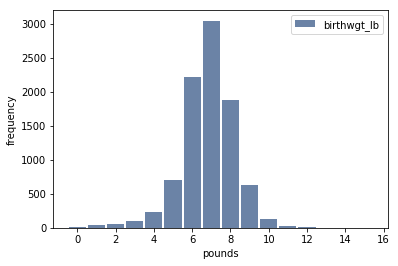

<Figure size 576x432 with 0 Axes>

In [9]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

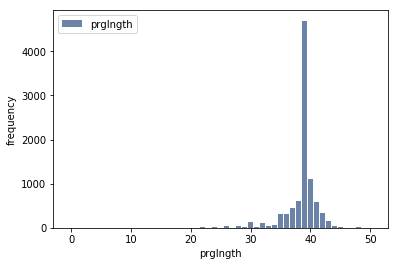

<Figure size 576x432 with 0 Axes>

In [17]:

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='prglngth', ylabel='frequency')

Early babies are common, but pregnancies seldom go past 43
weeks, and doctors often intervene if they do.

In [11]:
live.agepreg.describe()

count    9148.000000
mean       24.940751
std         5.567399
min        10.830000
25%        20.500000
50%        24.330000
75%        28.910000
max        44.080000
Name: agepreg, dtype: float64

**There are fewer “first babies” than “others,”**

# Presentation

# Building the Model

## Identify the features

In [54]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [74]:
X = live.agepreg.values
y = live.totalwgt_lb.values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

## Split Data into Training and Test Set

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [76]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

# Presentation

# Evaluating the Model

In [84]:
reg.score(X_train, y_train)

0.007877985170462898

In [87]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

2.0353624381155084


In [80]:
y_pred = reg.predict(X_test)

In [82]:
for yp,ya in zip(y_pred,y_test):
    print(yp,ya)

[7.28110377] [5.75]
[7.34807434] [8.]
[7.38334551] [7.8125]
[7.36102198] [7.3125]
[7.30521318] [5.]
[7.3592361] [7.6875]
[7.38714051] [1.875]
[7.13399176] [6.]
[7.25498525] [5.875]
[7.22529496] [7.5625]
[7.22708085] [7.875]
[7.14716263] [7.3125]
[7.17685292] [6.]
[7.28467553] [7.4375]
[7.12104411] [9.9375]
[7.31079406] [8.625]
[7.10988235] [5.375]
[7.50612488] [6.9375]
[7.18801468] [4.9375]
[7.18980056] [7.5]
[7.1545294] [6.5]
[7.14336764] [6.3125]
[7.12483911] [7.25]
[7.26056613] [8.3125]
[7.20475732] [6.5625]
[7.3275367] [7.375]
[7.36280787] [7.75]
[7.37955051] [7.5]
[7.30141818] [6.5]
[7.51907253] [6.]
[7.21591908] [6.]
[7.12662499] [8.375]
[7.24940437] [7.6875]
[7.23444761] [8.5]
[7.22886673] [7.5625]
[7.08197795] [6.4375]
[7.21770497] [6.375]
[7.13041999] [8.0625]
[7.34249346] [6.375]
[7.13041999] [7.4375]
[7.11724911] [9.5625]
[7.53402929] [6.3125]
[7.23266173] [6.6875]
[7.20855232] [8.]
[7.09872059] [8.125]
[7.42062579] [8.875]
[7.30900817] [7.75]
[7.25878025] [8.125]
[7.2978464